<a href="https://colab.research.google.com/github/ptrim22/Bootcamp/blob/main/Trauma_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import linear_model, preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline 
from scipy import stats
# random enables us to generate random numbers
import random
df=pd.read_csv(r'drive/MyDrive/Data Science Bootcamp/CogEmoPaper_FinalData.csv')

In [8]:
df

,ID,Age,Gender,FamilyStatus,Education,CFS_Total,TOT_TRAUMA,DTS_TOT,Total_FREE,Total_PACT,PCL_Total
0,3,27.0,0,1,15,58,4,39,14.0,10.250000,46.117647
1,4,38.0,1,2,16,58,2,40,20.5,10.250000,25.411765
2,6,29.0,1,1,16,51,4,33,14.0,8.330000,21.647059
3,7,24.0,1,1,16,58,1,0,14.5,8.330000,16.800000
4,8,25.0,1,1,17,58,1,56,13.5,6.000000,34.823529
...,...,...,...,...,...,...,...,...,...,...,...
104,156,25.0,0,1,14,56,5,30,15.0,9.750000,20.000000
105,157,23.0,1,2,14,37,2,76,18.0,6.000000,31.200000
106,160,21.0,1,1,12,62,2,61,16.5,10.000000,39.200000
107,161,29.0,0,1,16,61,1,11,14.0,8.833333,17.600000


In [9]:
df.describe()

,ID,Age,Gender,FamilyStatus,Education,CFS_Total,TOT_TRAUMA,DTS_TOT,Total_FREE,Total_PACT,PCL_Total
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,79.339450,25.225688,0.788991,1.302752,14.431193,56.293578,2.366972,40.889908,15.270642,9.158961,29.232596
std,45.915426,4.624420,0.409910,0.461571,2.157532,7.217908,1.613947,26.557882,2.839480,2.132077,11.339982
min,3.000000,19.000000,0.000000,1.000000,12.000000,37.000000,1.000000,0.000000,7.000000,2.666700,16.000000
25%,40.000000,22.000000,1.000000,1.000000,13.000000,52.000000,1.000000,20.000000,13.500000,7.830000,19.764706
50%,77.000000,24.000000,1.000000,1.000000,13.000000,57.000000,2.000000,39.000000,15.500000,9.160000,27.294118
75%,115.000000,27.000000,1.000000,2.000000,16.000000,61.000000,3.000000,57.000000,17.000000,10.500000,34.823529
max,163.000000,39.000000,1.000000,2.000000,20.000000,72.000000,7.000000,120.000000,24.000000,14.000000,68.705882


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff802f01990>,
      dtype=object)

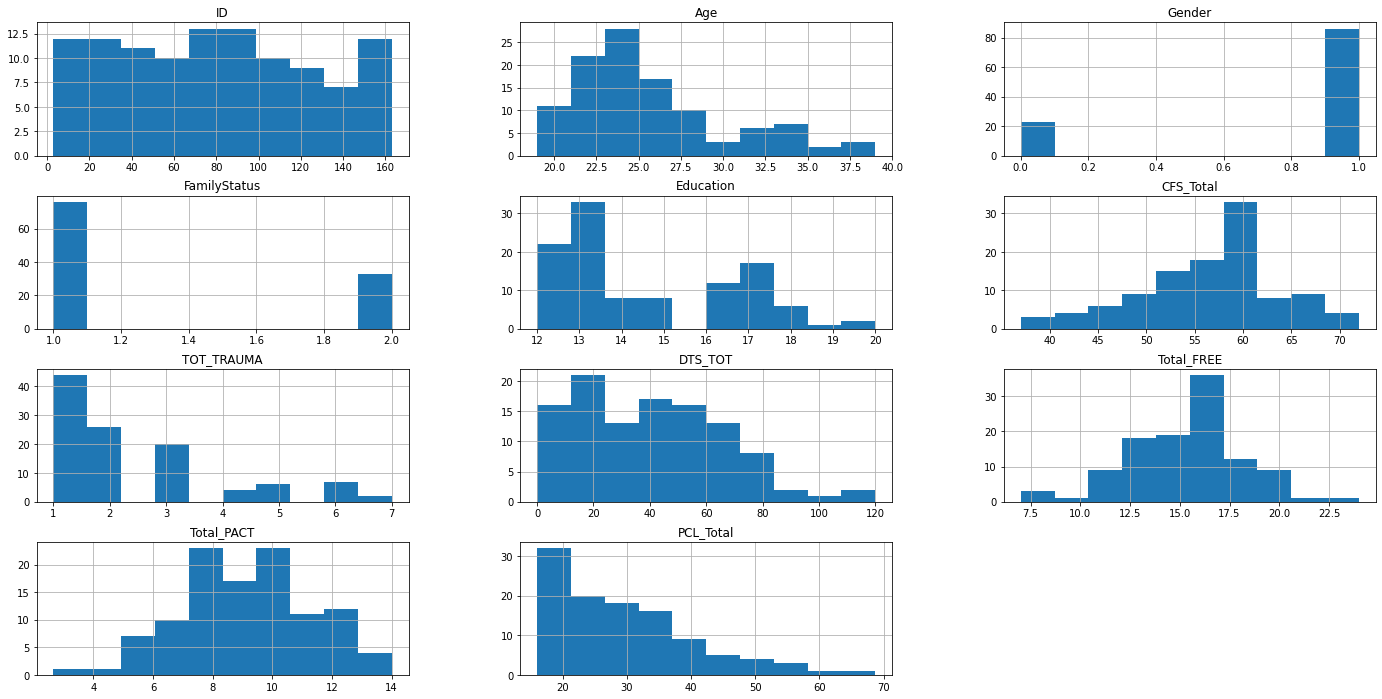

In [10]:
df.hist(figsize=(24,12))

In [11]:
df.isnull()


,ID,Age,Gender,FamilyStatus,Education,CFS_Total,TOT_TRAUMA,DTS_TOT,Total_FREE,Total_PACT,PCL_Total
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
104,False,False,False,False,False,False,False,False,False,False,False
105,False,False,False,False,False,False,False,False,False,False,False
106,False,False,False,False,False,False,False,False,False,False,False
107,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()


ID              0
Age             0
Gender          0
FamilyStatus    0
Education       0
CFS_Total       0
TOT_TRAUMA      0
DTS_TOT         0
Total_FREE      0
Total_PACT      0
PCL_Total       0
dtype: int64

In [13]:
df.corr()

,ID,Age,Gender,FamilyStatus,Education,CFS_Total,TOT_TRAUMA,DTS_TOT,Total_FREE,Total_PACT,PCL_Total
ID,1.000000,-0.037186,-0.100947,-0.063438,-0.336479,-0.085572,-0.024312,-0.125659,-0.112709,-0.080492,-0.121368
Age,-0.037186,1.000000,-0.270653,0.436187,0.623443,0.159444,0.134446,-0.239452,0.277928,-0.003655,-0.211873
Gender,-0.100947,-0.270653,1.000000,-0.001796,-0.011334,-0.194805,-0.091808,0.156897,-0.097652,-0.172698,0.093779
FamilyStatus,-0.063438,0.436187,-0.001796,1.000000,0.406971,0.145387,-0.100803,-0.313745,0.180638,0.100427,-0.238531
Education,-0.336479,0.623443,-0.011334,0.406971,1.000000,0.073253,-0.040545,-0.053298,0.139472,0.015439,-0.067783
CFS_Total,-0.085572,0.159444,-0.194805,0.145387,0.073253,1.000000,-0.169890,-0.319884,0.279805,0.321059,-0.420538
TOT_TRAUMA,-0.024312,0.134446,-0.091808,-0.100803,-0.040545,-0.169890,1.000000,0.258663,0.041771,-0.149167,0.232702
DTS_TOT,-0.125659,-0.239452,0.156897,-0.313745,-0.053298,-0.319884,0.258663,1.000000,-0.296986,-0.331431,0.500627
Total_FREE,-0.112709,0.277928,-0.097652,0.180638,0.139472,0.279805,0.041771,-0.296986,1.000000,0.316544,-0.291194
Total_PACT,-0.080492,-0.003655,-0.172698,0.100427,0.015439,0.321059,-0.149167,-0.331431,0.316544,1.000000,-0.317508


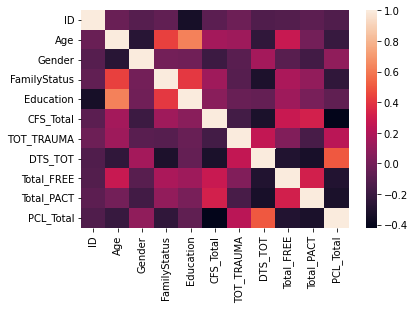

In [14]:
sns.heatmap(df.corr())

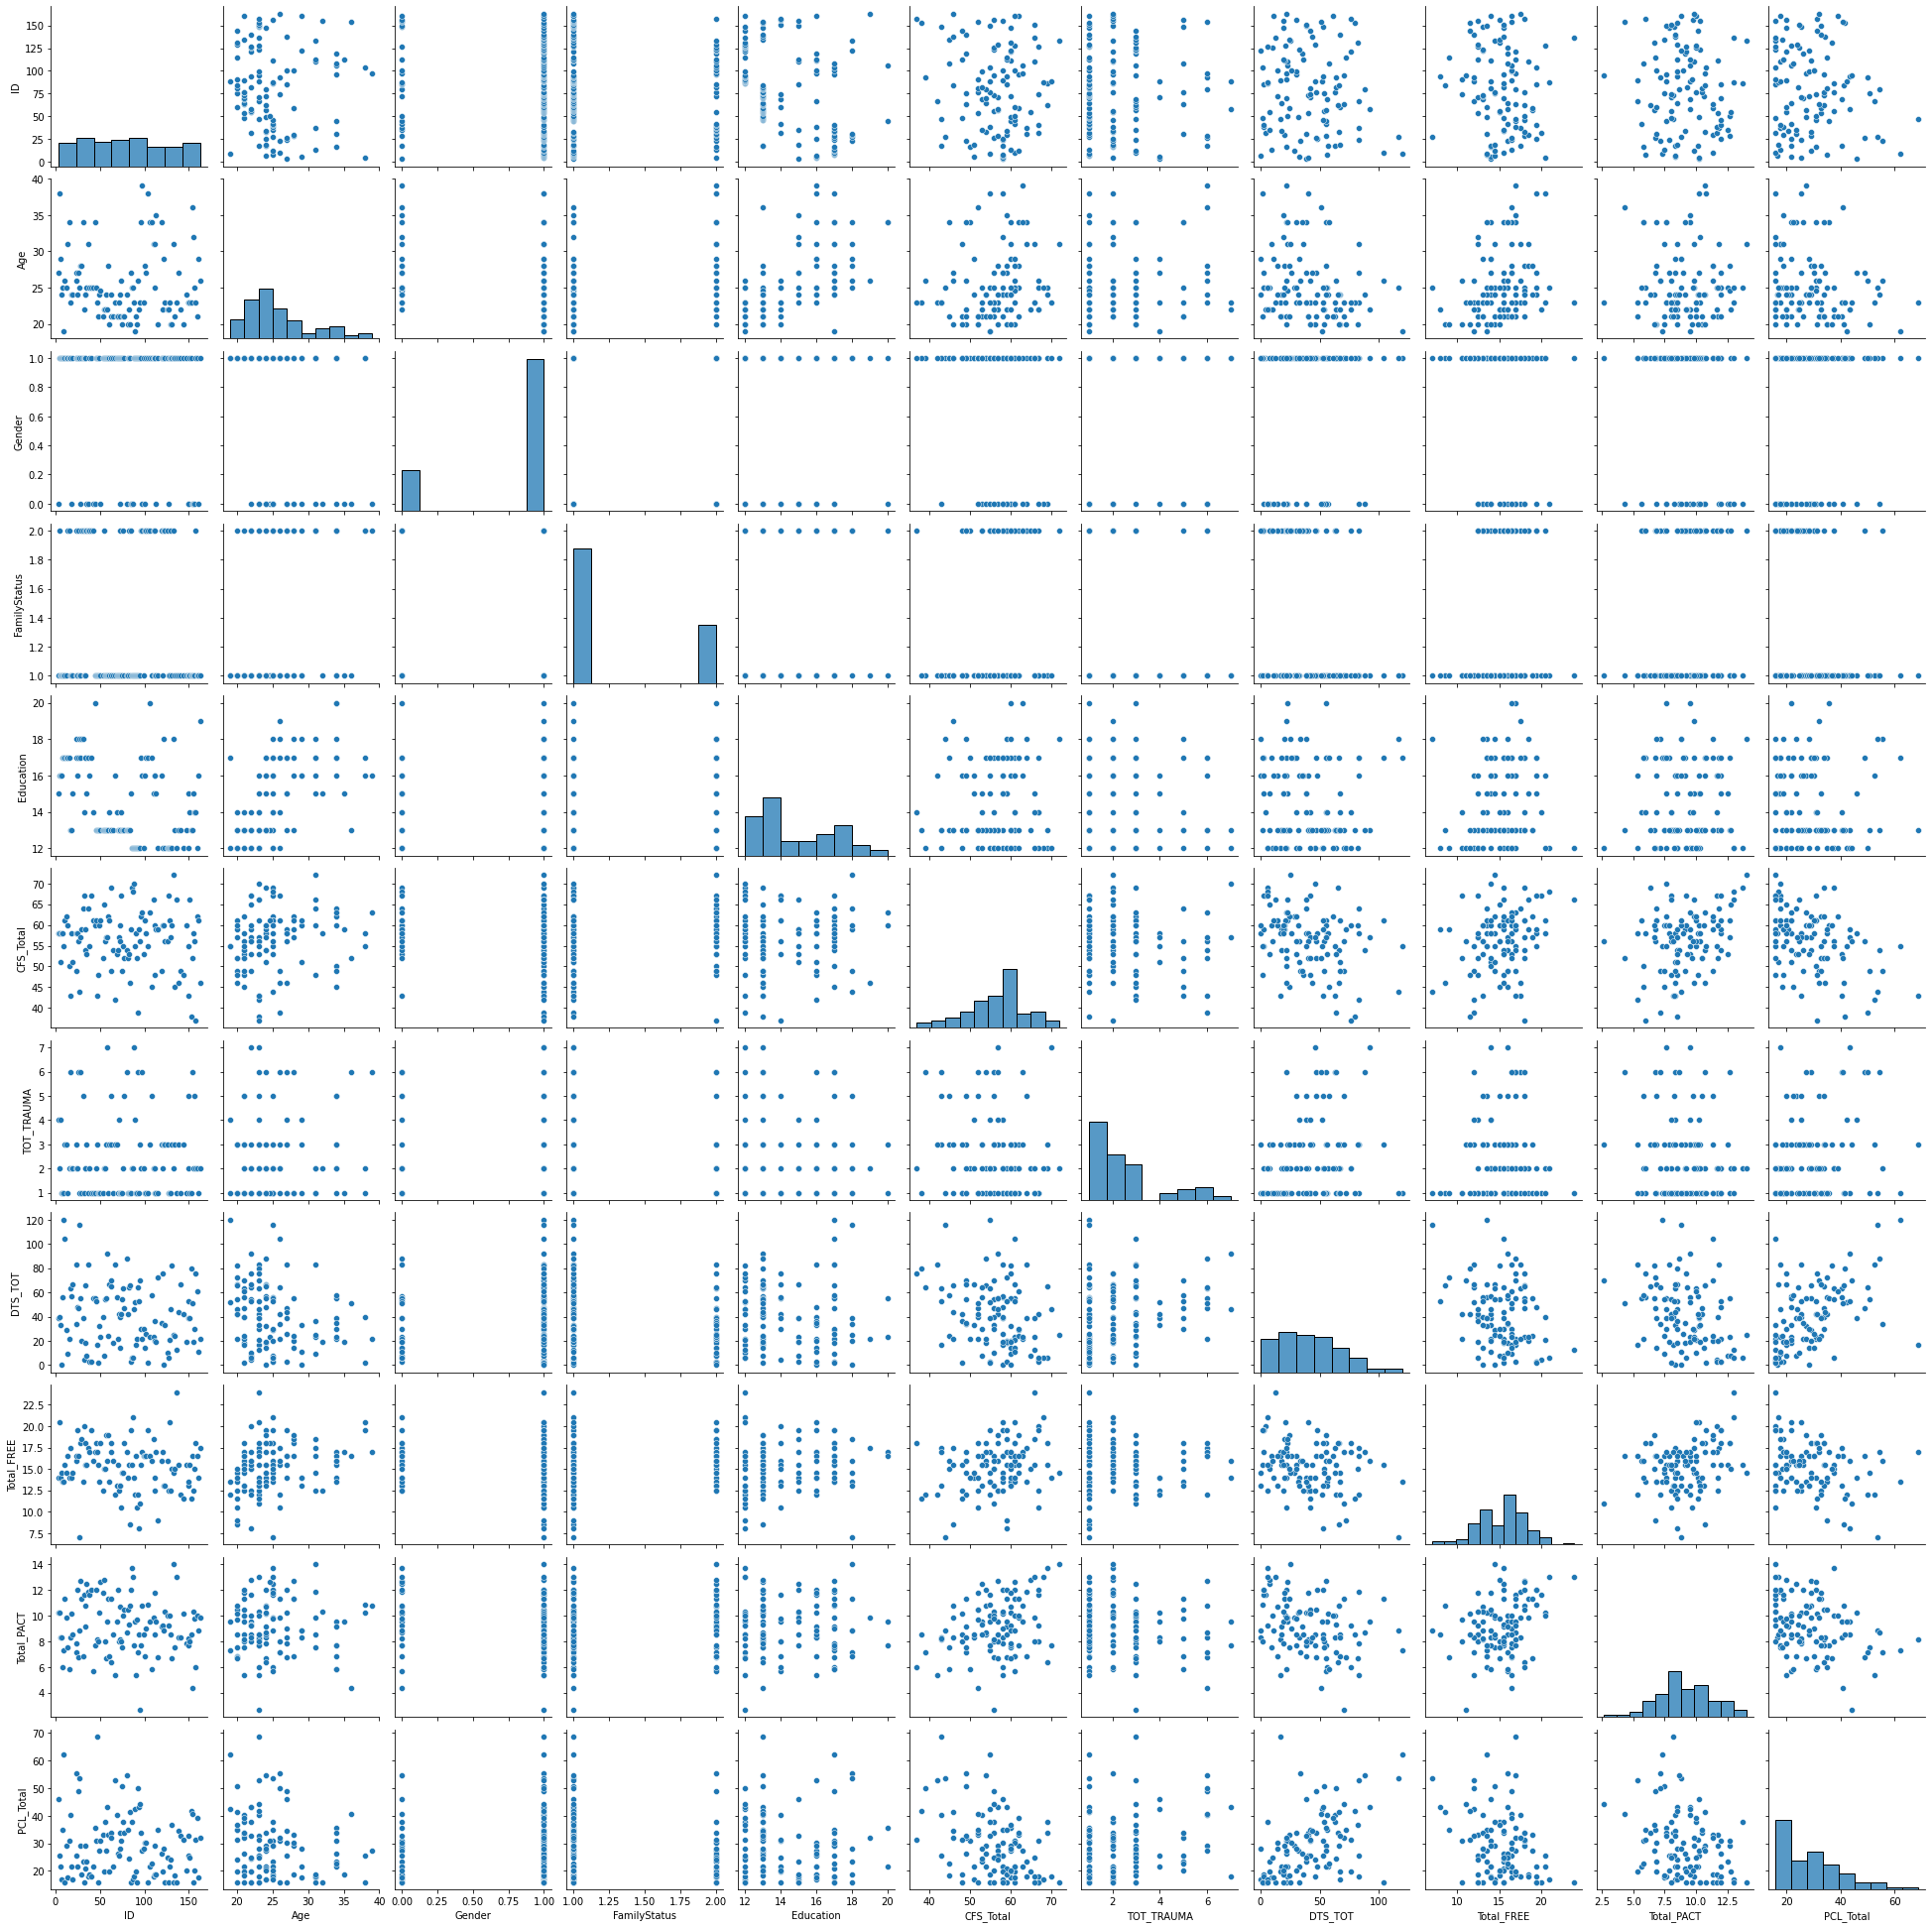

In [15]:
sns.pairplot(df)

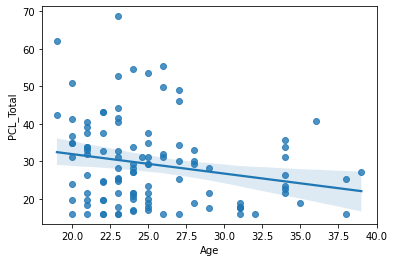

In [16]:
sns.regplot(x='Age',y='PCL_Total',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


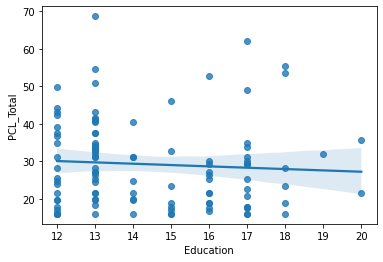

In [17]:
sns.regplot('Education',y='PCL_Total',data=df)

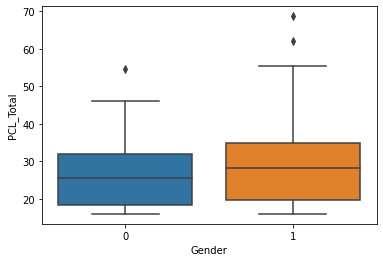

In [18]:
sns.boxplot(x='Gender',y='PCL_Total',data=df)

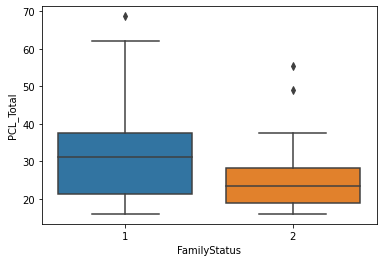

In [19]:
sns.boxplot(x='FamilyStatus',y='PCL_Total',data=df)

In [20]:
df.value_counts(['Gender','FamilyStatus'])

Gender  FamilyStatus
1       1               60
        2               26
0       1               16
        2                7
dtype: int64

In [21]:
df.groupby(['Gender','FamilyStatus']).mean('Age')

ID        Age  ...  Total_PACT  PCL_Total
Gender FamilyStatus                        ...                       
0      1             97.625000  27.287500  ...    9.795414  28.785294
       2             66.857143  28.428571  ...   10.032857  23.529412
1      1             76.883333  23.000000  ...    8.811344  31.599216
       2             77.115385  28.230769  ...    9.334212  25.581900

[4 rows x 9 columns]

In the absence of a data dictionary, some educated guesses may be necessary to translate our variables into meaningful descriptions. Taking into account that our sample is approximately 80% gender '1', a higher average PCL_Total score (present trauma symptoms), it is supposed that gender 1 is female and gender 0 is male.  It is also supposed that family status 2 is married and 1 is single.


In [22]:
X=df['Education'].values
y=df['PCL_Total'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
print(X_train,X_test,y_train,y_test)

[13 13 17 14 13 17 13 12 13 13 17 15 13 12 17 13 12 17 17 18 12 12 17 17
 13 13 18 15 15 16 18 13 12 17 14 13 18 13 13 12 14 12 12 14 14 14 13 13
 13 13 20 13 19 15 12 12 13 20 13 16 13 14 16 17 12 15 17 12 16 18 12 12
 17 13 14 13] [16 13 17 18 12 12 13 16 12 13 16 15 15 12 17 16 13 16 16 13 15 13 12 16
 17 13 13 17 16 13 12 12 17] [27.29411765 54.58823529 33.88235294 21.64705882 32.94117647 62.11764706
 37.64705882 17.88235294 43.29411765 32.94117647 48.94117647 16.
 31.05882353 43.29411765 29.17647059 32.         49.88235294 30.11764706
 17.88235294 18.82352941 21.6        16.         17.88235294 17.6
 41.6        28.23529412 55.52941176 17.88235294 23.52941176 16.8
 53.64705882 27.29411765 16.         16.         20.         32.8
 16.         33.88235294 33.88235294 25.6        40.47058824 19.76470588
 16.94117647 31.2        24.8        19.76470588 41.41176471 25.41176471
 34.4        24.47058824 21.64705882 16.         32.         16.
 42.35294118 39.2        37.64705882 35.76470

In [24]:
rEdModel=linear_model.LinearRegression()
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
y_train=y_train.reshape(-1,1)
results=rEdModel.fit(X_train,y_train)

In [25]:
rEdModel.score(X_train,y_train)

0.002237360392617127

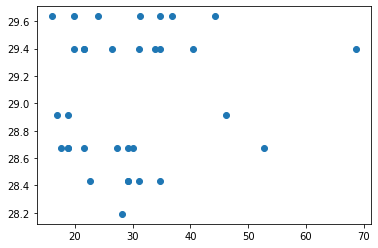

In [26]:
y_predict=rEdModel.predict(X_test)
plt.scatter(y_test,y_predict)
plt.show()

Education, as appeared in the scatterplot against PCL_Total, would seem to add little to any explanatory or predictive model of trauma symptoms score, as can be seen from the low Rsquared value and the random nature of the predicted vs actual PCL_Total trauma scores. It will be dropped from further analysis.


In [27]:
X=df['Age'].values
y=df['PCL_Total'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rAgeModel=linear_model.LinearRegression()
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
y_train=y_train.reshape(-1,1)
rAgeModel.fit(X_train,y_train)
rAgeModel.score(X_train,y_train)

0.052637637205067866

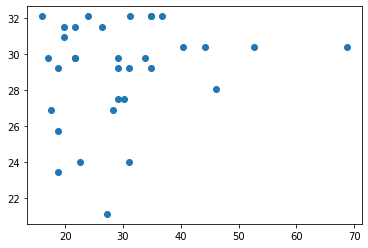

In [28]:
y_predict=rAgeModel.predict(X_test)
plt.scatter(y_test,y_predict)
plt.show()

Age explains about 5% of the varation in PCL_Total scores (present trauma symptoms). It may be factored into a future multivariate regression model but does not appear to be a major driver, and may have covariance with other explanatory variables as well.

The other "demographic" variables, gender and family status, are categorical rather than quantitative and lend themselves more logically to an equality of means test rather than a univariate regression model.

In [29]:
df.groupby('FamilyStatus').mean()

,ID,Age,Gender,Education,CFS_Total,TOT_TRAUMA,DTS_TOT,Total_FREE,Total_PACT,PCL_Total
FamilyStatus,,,,,,,,,,
1,81.250000,23.902632,0.789474,13.855263,55.605263,2.473684,46.355263,14.934211,9.018517,31.006811
2,74.939394,28.272727,0.787879,15.757576,57.878788,2.121212,28.303030,16.045455,9.482409,25.146524


Married subjects have about 6 points lower trauma score, on average, than single subjects.

In [30]:
df.groupby('Gender').mean('PCL_Total')

,ID,Age,FamilyStatus,Education,CFS_Total,TOT_TRAUMA,DTS_TOT,Total_FREE,Total_PACT,PCL_Total
Gender,,,,,,,,,,
0,88.260870,27.634783,1.304348,14.478261,59.000000,2.652174,32.869565,15.804348,9.867680,27.185678
1,76.953488,24.581395,1.302326,14.418605,55.569767,2.290698,43.034884,15.127907,8.969421,29.780027


Male subjects have about 2.5 point lower trauma score, on average, than female.

In [31]:
married=df['PCL_Total'][df['FamilyStatus']==2]
single=df['PCL_Total'][df['FamilyStatus']==1]
print(married, single)

1      25.411765
8      17.600000
9      31.058824
13     55.529412
16     48.941176
19     18.823529
20     23.529412
23     20.705882
24     23.529412
25     17.882353
26     18.823529
27     17.882353
28     21.647059
36     19.764706
49     28.235294
53     37.647059
57     24.470588
59     16.000000
69     33.882353
70     27.294118
72     30.117647
73     30.117647
74     16.000000
75     21.647059
77     17.882353
79     18.823529
82     26.352941
84     28.235294
85     16.000000
86     24.800000
89     24.000000
91     16.000000
105    31.200000
Name: PCL_Total, dtype: float64 0      46.117647
2      21.647059
3      16.800000
4      34.823529
5      62.117647
         ...    
103    16.000000
104    20.000000
106    39.200000
107    17.600000
108    32.000000
Name: PCL_Total, Length: 76, dtype: float64


In [32]:
marriednormal=stats.normaltest(married)
singlenormal=stats.normaltest(single)
print(marriednormal,singlenormal)

NormaltestResult(statistic=20.53955773078347, pvalue=3.4665040217596635e-05) NormaltestResult(statistic=8.818813907019809, pvalue=0.012162389053695858)


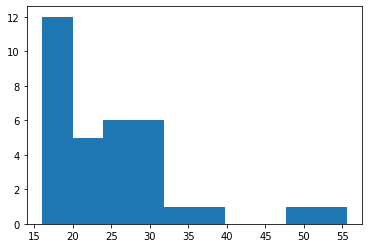

In [33]:
plt.hist(married)
plt.show()

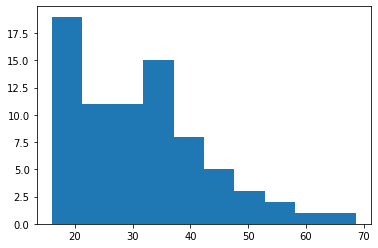

In [34]:
plt.hist(single)
plt.show()

In [35]:
#Let's see what a permutation of the trauma scores looks like when we group by marriage status...
df['Permutation1']=np.random.permutation(df['PCL_Total'])

# Call the describe() method on our permutation grouped by 'platform'. 
df.groupby('FamilyStatus')['Permutation1'].describe()

,count,mean,std,min,25%,50%,75%,max
FamilyStatus,,,,,,,,
1,76.0,29.183282,10.568387,16.0,19.941176,28.235294,34.011765,62.117647
2,33.0,29.346168,13.123048,16.0,18.823529,24.470588,34.823529,68.705882


This led to a difference of 1, much smaller than our observed actual difference of 6 points. This suggests pursuing creating many replicate samples, permuting the trauma scores, and observing the group mean differences among all the samples.

Text(0.5, 0, 'Difference in Married vs Single Trauma Scores over 10,000 Replicated Samples')

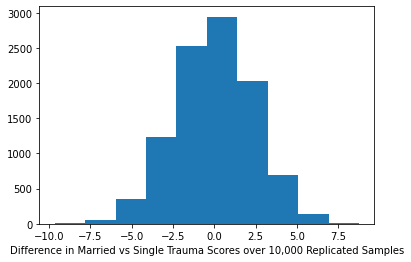

In [36]:
diff=np.empty(10000)
dfperm=df
for i in range(10000):
    dfperm['PermutedPCL']=np.random.permutation(df['PCL_Total'])
    marriedmean=dfperm.loc[dfperm['FamilyStatus']==2,'PermutedPCL'].mean()
    singlemean=dfperm.loc[dfperm['FamilyStatus']==1,'PermutedPCL'].mean()
    diff[i]=singlemean-marriedmean
histo=plt.hist(diff)
plt.xlabel('Difference in Married vs Single Trauma Scores over 10,000 Replicated Samples')


In [37]:
obs_difference=df.loc[df['FamilyStatus']==1,'PCL_Total'].mean()-df.loc[df['FamilyStatus']==2,'PCL_Total'].mean()

# Make this difference absolute with the built-in abs() function. 
obs_difference=np.abs(obs_difference)

# Print out this value
print(obs_difference)

5.8602870817583685


In [38]:
p_value=np.sum(np.abs(diff)>=obs_difference)/len(diff)
print(p_value)

0.0114


P-value of .01 indicates that we would only get a group mean difference at least as extreme as the one we did get in only approximately 1% of similar samples. Thus we can be reasonably confident that the lower trauma score among married subjects (versus single counterparts) is statistically significant.

Let's try the same sort of simulation and analysis with respect to gender, to investigate whether our observed difference between males and females was likely to have occurred due to random sampling differences.

Text(0.5, 0, 'Difference in Male vs Female Trauma Scores over 10,000 Replicated Samples')

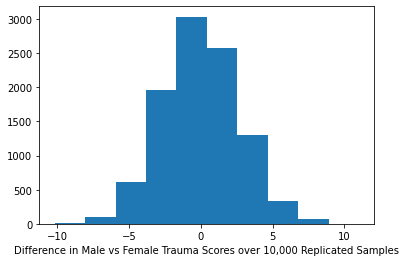

In [39]:
diff=np.empty(10000)
dfperm=df
for i in range(10000):
    dfperm['PermutedPCL']=np.random.permutation(df['PCL_Total'])
    malemean=dfperm.loc[dfperm['Gender']==0,'PermutedPCL'].mean()
    femalemean=dfperm.loc[dfperm['Gender']==1,'PermutedPCL'].mean()
    diff[i]=malemean-femalemean
histo=plt.hist(diff)
plt.xlabel('Difference in Male vs Female Trauma Scores over 10,000 Replicated Samples')


In [40]:
obs_difference=df.loc[df['Gender']==1,'PCL_Total'].mean()-df.loc[df['Gender']==0,'PCL_Total'].mean()

# Make this difference absolute with the built-in abs() function. 
obs_difference=np.abs(obs_difference)

# Print out this value
print(obs_difference)

2.594349610955504


In [41]:
p_value=np.sum(np.abs(diff)>=obs_difference)/len(diff)
print(p_value)

0.3335


The p-value here of .33 indicates that while we did observe a trauma score difference between males and females, the size of the difference could easily occur simply due to random chance among the subjects in the sample.

Hence Family (Marriage) status could be kept as an explanatory variable but gender can reasonably discarded from the model for the sake of simplicity and elegance.

In [42]:
df


,ID,Age,Gender,FamilyStatus,Education,CFS_Total,TOT_TRAUMA,DTS_TOT,Total_FREE,Total_PACT,PCL_Total,Permutation1,PermutedPCL
0,3,27.0,0,1,15,58,4,39,14.0,10.250000,46.117647,50.823529,21.647059
1,4,38.0,1,2,16,58,2,40,20.5,10.250000,25.411765,32.941176,20.000000
2,6,29.0,1,1,16,51,4,33,14.0,8.330000,21.647059,33.882353,37.647059
3,7,24.0,1,1,16,58,1,0,14.5,8.330000,16.800000,46.117647,31.200000
4,8,25.0,1,1,17,58,1,56,13.5,6.000000,34.823529,30.117647,24.470588
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,156,25.0,0,1,14,56,5,30,15.0,9.750000,20.000000,16.000000,17.882353
105,157,23.0,1,2,14,37,2,76,18.0,6.000000,31.200000,16.000000,40.800000
106,160,21.0,1,1,12,62,2,61,16.5,10.000000,39.200000,21.647059,17.882353
107,161,29.0,0,1,16,61,1,11,14.0,8.833333,17.600000,24.800000,29.176471


In [43]:
df=df.rename(columns={'FamilyStatus':'Married','CFS_Total':'Cog_Flex','Total_FREE':'Flex_Emot_Express','Total_PACT':'Flex_Coping','PCL_Total':'PTSD_Symptoms'})


In [44]:
dfmodel=df.drop(['ID','Gender','Education','TOT_TRAUMA','DTS_TOT','Permutation1','PermutedPCL'],axis=1)


In [45]:
dfmodel

,Age,Married,Cog_Flex,Flex_Emot_Express,Flex_Coping,PTSD_Symptoms
0,27.0,1,58,14.0,10.250000,46.117647
1,38.0,2,58,20.5,10.250000,25.411765
2,29.0,1,51,14.0,8.330000,21.647059
3,24.0,1,58,14.5,8.330000,16.800000
4,25.0,1,58,13.5,6.000000,34.823529
...,...,...,...,...,...,...
104,25.0,1,56,15.0,9.750000,20.000000
105,23.0,2,37,18.0,6.000000,31.200000
106,21.0,1,62,16.5,10.000000,39.200000
107,29.0,1,61,14.0,8.833333,17.600000


In [48]:
dfmodel.loc[dfmodel['Married']==1,'Married']=0
dfmodel.loc[dfmodel['Married']==2,'Married']=1
dfmodel

,Age,Married,Cog_Flex,Flex_Emot_Express,Flex_Coping,PTSD_Symptoms
0,27.0,0,58,14.0,10.250000,46.117647
1,38.0,1,58,20.5,10.250000,25.411765
2,29.0,0,51,14.0,8.330000,21.647059
3,24.0,0,58,14.5,8.330000,16.800000
4,25.0,0,58,13.5,6.000000,34.823529
...,...,...,...,...,...,...
104,25.0,0,56,15.0,9.750000,20.000000
105,23.0,1,37,18.0,6.000000,31.200000
106,21.0,0,62,16.5,10.000000,39.200000
107,29.0,0,61,14.0,8.833333,17.600000


In [49]:
y=dfmodel['PTSD_Symptoms']
X=dfmodel.drop(columns='PTSD_Symptoms',axis=1)

In [50]:
X

,Age,Married,Cog_Flex,Flex_Emot_Express,Flex_Coping
0,27.0,0,58,14.0,10.250000
1,38.0,1,58,20.5,10.250000
2,29.0,0,51,14.0,8.330000
3,24.0,0,58,14.5,8.330000
4,25.0,0,58,13.5,6.000000
...,...,...,...,...,...
104,25.0,0,56,15.0,9.750000
105,23.0,1,37,18.0,6.000000
106,21.0,0,62,16.5,10.000000
107,29.0,0,61,14.0,8.833333


In [51]:
y


0      46.117647
1      25.411765
2      21.647059
3      16.800000
4      34.823529
         ...    
104    20.000000
105    31.200000
106    39.200000
107    17.600000
108    32.000000
Name: PTSD_Symptoms, Length: 109, dtype: float64

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.4,random_state=42)
linreg=LinearRegression()
linreg.fit(X_train,y_train)
train_score=linreg.score(X_train,y_train)
test_score=linreg.score(X_test,y_test)
y_pred=linreg.predict(X_test)
rootMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print(train_score)
print(test_score)
print(rootMSE)


0.3748306917918973
0.015189102132859844
12.081509208826645


In [65]:
lincv=cross_val_score(linreg,X,y,cv=5)
print(lincv)
meancvscore=np.mean(lincv)
print('Average r^2 for cross validation folds is {}'.format(meancvscore))

[ 0.17854205  0.07758338  0.18984929  0.30551285 -0.20805953]
Average r^2 for cross validation folds is 0.1086856069104084


Coefficients: 
 [ 0.00696214 -3.32990613 -0.48142731 -0.96034083 -0.27762885]
Mean squared error: 145.96
Coefficient of determination: 0.015


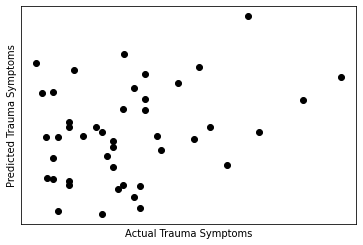

In [69]:
# The coefficients
print("Coefficients: \n", linreg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.3f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test,y_pred, color="black")
plt.xlabel('Actual Trauma Symptoms')
plt.ylabel('Predicted Trauma Symptoms')

plt.xticks(())
plt.yticks(())

plt.show()

In [96]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
parameters = {'alpha' : np.linspace(0,10,100)}
lasso=Lasso()
lasso_cv = GridSearchCV(lasso, param_grid=parameters)
lasso_cv.fit(X_train_scaled, y_train)
X_test_scaled=scaler.transform(X_test)
lasso_cv.predict(X_test_scaled)
print(lasso_cv.best_score_)
print(lasso_cv.best_params_)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.895e+03, tolerance: 5.484e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

0.2433790853098594
{'alpha': 0.6060606060606061}


In [97]:
parameters = {'alpha' : np.linspace(0,1,100)}
lasso=Lasso()
lasso_cv = GridSearchCV(lasso, param_grid=parameters)
lasso_cv.fit(X_train_scaled, y_train)
X_test_scaled=scaler.transform(X_test)
lasso_cv.predict(X_test_scaled)
print(lasso_cv.best_score_)
print(lasso_cv.best_params_)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.895e+03, tolerance: 5.484e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

0.24344438514677208
{'alpha': 0.6161616161616162}


0.3670993935315001
0.005612476064723926
[-0.         -1.11103084 -3.41265704 -2.66699822 -0.2730538 ]


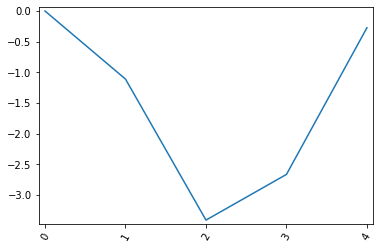

In [98]:
lasso_alpha=Lasso(alpha=.616)
lasso_alpha.fit(X_train_scaled, y_train)
y_pred=lasso_alpha.predict(X_test_scaled)
print(lasso_alpha.score(X_train_scaled,y_train))
print(lasso_alpha.score(X_test_scaled,y_test))

lasso_coef = lasso_alpha.coef_
print(lasso_coef)
X_train_scaled=pd.DataFrame(X_train_scaled)
y_train_scaled=pd.DataFrame(X_test_scaled)
# Plot the coefficients
plt.plot(range(len(X_train_scaled.columns)), lasso_coef)
plt.xticks(range(len(X_train_scaled.columns)), X_train_scaled.columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [101]:
parameters = {'alpha' : np.linspace(0,100,100)}
ridge=Ridge()
ridge_cv = GridSearchCV(ridge, param_grid=parameters)
ridge_cv.fit(X_train_scaled, y_train)
ridge_cv.predict(X_test_scaled)
print(ridge_cv.best_score_)
print(ridge_cv.best_params_)

0.2408790009682627
{'alpha': 23.232323232323235}


In [102]:
parameters = {'alpha' : np.linspace(20,30,100)}
ridge=Ridge()
ridge_cv = GridSearchCV(ridge, param_grid=parameters)
ridge_cv.fit(X_train_scaled, y_train)
ridge_cv.predict(X_test_scaled)
print(ridge_cv.best_score_)
print(ridge_cv.best_params_)

0.2408795738793305
{'alpha': 23.434343434343432}


0.3607352970439808
0.03875370593143579
[-0.37075365 -1.17454395 -2.75820029 -2.31594352 -0.94834144]


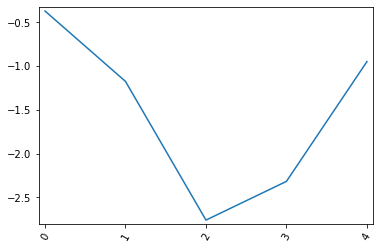

In [104]:
ridge_alpha=Ridge(alpha=23.43)
ridge_alpha.fit(X_train_scaled, y_train)
y_pred=ridge_alpha.predict(X_test_scaled)
print(ridge_alpha.score(X_train_scaled,y_train))
print(ridge_alpha.score(X_test_scaled,y_test))

ridge_coef = ridge_alpha.coef_
print(ridge_coef)
# Plot the coefficients
plt.plot(range(len(X_train_scaled.columns)), ridge_coef)
plt.xticks(range(len(X_train_scaled.columns)), X_train_scaled.columns.values, rotation=60)
plt.margins(0.02)
plt.show()